# Proyecto Data Science - Parte I: Análisis de Datos de Publicidad en Redes Sociales

**Autor:** Xavier Gutierrez  
**Fecha:** Septiembre 2025  
**Curso:** CoderHouse - Data Science I  
**Comisión:** 77695

**Fuente de datos:** [Social Media Advertisement Performance Dataset](https://www.kaggle.com/datasets/alperenmyung/social-media-advertisement-performance?select=ad_events.csv)

**Nota sobre la fuente:** El archivo `ad_campaign_db.sqlite` incluido en el dataset de Kaggle fue fundamental para entender las relaciones entre las tablas, lo que facilitó la realización de los merge entre los diferentes archivos CSV.

---

## 1. Abstract

Este proyecto utiliza un dataset de publicidad en redes sociales con cuatro tablas relacionadas: eventos de usuarios con anuncios (`ad_events`), información de anuncios (`ads`), campañas publicitarias (`campaigns`) y datos demográficos de usuarios (`users`). 

El objetivo principal es responder preguntas simples sobre el comportamiento publicitario utilizando herramientas de estadística básica y visualizaciones claras con pandas y matplotlib. 

La metodología incluye: limpieza y unificación de datos, análisis de distribuciones, comparaciones por género, evaluación de efectividad por horarios y análisis de desempeño por campañas y plataformas. 

Esta base descriptiva servirá como fundamento para futuros trabajos de predicción de CTR (Click-Through Rate) o segmentación avanzada de audiencias.

**Nota del estudiante:** Este es mi primer análisis completo de datos publicitarios. Me enfocaré en hacer cada paso claro y bien documentado.

## 2. Preguntas / Hipótesis de Interés

Las siguientes preguntas guiarán nuestro análisis exploratorio:

1. **¿Cómo se distribuyen los tipos de evento?** - Esperamos ver un embudo típico: muchas impresiones, menos clics.

2. **¿Cuál es la edad promedio de quienes interactúan?** - Hipótesis: usuarios entre 25-35 años son más activos.

3. **¿Cambian las proporciones por género según el tipo de evento?** - Queremos ver si hay diferencias en comportamiento.

4. **¿Qué campañas concentran más interacción y cuál es su CTR?** - Distinguir volumen vs eficiencia.

5. **¿Qué franja horaria tiene mejor CTR?** - Optimizar timing de anuncios.

6. **¿Qué plataformas muestran mejor balance entre volumen y CTR?** - Decisiones de inversión por canal.

## 3. Carga de Datos y Mini Diccionario

### 3.1 Configuración inicial y funciones auxiliares

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def p(filename):
    """Genera ruta relativa hacia archivos en la carpeta storage/"""
    return os.path.join(".", "storage", filename)

plt.rcParams['figure.figsize'] = (10, 6)
print("Librerías cargadas correctamente")
print(f"Directorio de trabajo: {os.getcwd()}")

Librerías cargadas correctamente
Directorio de trabajo: /Users/xavier.gutierrez/coderhouse_datascience_I/primera entrega


### 3.2 Carga de archivos CSV

In [26]:
print("Cargando archivos CSV...")

try:
    ad_events = pd.read_csv(p("ad_events.csv"))
    ads = pd.read_csv(p("ads.csv"))
    campaigns = pd.read_csv(p("campaigns.csv"))
    users = pd.read_csv(p("users.csv"))
    print("Todos los archivos cargados exitosamente")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Verifica que la carpeta 'storage/' existe y contiene los archivos CSV")

Cargando archivos CSV...
Todos los archivos cargados exitosamente


### 3.3 Exploración inicial de cada tabla

In [27]:
# Revisar estructura de ad_events
print("TABLA: ad_events")
print(f"Shape: {ad_events.shape}")
print("\nPrimeras 3 filas:")
display(ad_events.head(3))
print("\nTipos de datos:")
print(ad_events.dtypes)

TABLA: ad_events
Shape: (400000, 7)

Primeras 3 filas:


,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression



Tipos de datos:
event_id        int64
ad_id           int64
user_id        object
timestamp      object
day_of_week    object
time_of_day    object
event_type     object
dtype: object


In [28]:
print("TABLA: ads")
print(f"Shape: {ads.shape}")
print("\nPrimeras 3 filas:")
display(ads.head(3))
print("\nTipos de datos:")
print(ads.dtypes)

TABLA: ads
Shape: (200, 7)

Primeras 3 filas:


,ad_id,campaign_id,ad_platform,ad_type,target_gender,target_age_group,target_interests
0,1,28,Facebook,Video,Female,35-44,"art, technology"
1,2,33,Facebook,Stories,All,25-34,"travel, photography"
2,3,20,Instagram,Carousel,All,25-34,technology



Tipos de datos:
ad_id                int64
campaign_id          int64
ad_platform         object
ad_type             object
target_gender       object
target_age_group    object
target_interests    object
dtype: object


In [29]:
print("TABLA: campaigns")
print(f"Shape: {campaigns.shape}")
print("\nPrimeras 3 filas:")
display(campaigns.head(3))
print("\nTipos de datos:")
print(campaigns.dtypes)

TABLA: campaigns
Shape: (50, 6)

Primeras 3 filas:


,campaign_id,name,start_date,end_date,duration_days,total_budget
0,1,Campaign_1_Launch,2025-05-25,2025-07-23,59,24021.32
1,2,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41
2,3,Campaign_3_Winter,2025-05-04,2025-06-29,56,14343.25



Tipos de datos:
campaign_id        int64
name              object
start_date        object
end_date          object
duration_days      int64
total_budget     float64
dtype: object


In [30]:
print("TABLA: users")
print(f"Shape: {users.shape}")
print("\nPrimeras 3 filas:")
display(users.head(3))
print("\nTipos de datos:")
print(users.dtypes)

TABLA: users
Shape: (10000, 7)

Primeras 3 filas:


,user_id,user_gender,user_age,age_group,country,location,interests
0,a2474,Female,24,18-24,United Kingdom,New Mariomouth,"fitness, health"
1,141e5,Male,21,18-24,Germany,Danielsfort,"food, fitness, lifestyle"
2,34db0,Male,27,25-34,Australia,Vincentchester,"fashion, news"



Tipos de datos:
user_id        object
user_gender    object
user_age        int64
age_group      object
country        object
location       object
interests      object
dtype: object


### 3.4 Mini Diccionario de Variables

**Tabla `ad_events` - Eventos de interacción con anuncios:**
- `event_id`: Identificador único del evento
- `ad_id`: ID del anuncio que generó el evento
- `user_id`: ID del usuario que realizó la acción
- `timestamp`: Momento exacto del evento
- `day_of_week`: Día de la semana (lunes, martes, etc.)
- `time_of_day`: Franja horaria (mañana, tarde, noche)
- `event_type`: Tipo de interacción (impression, click, conversion)

**Tabla `ads` - Información de anuncios:**
- `ad_id`: Identificador único del anuncio
- `campaign_id`: ID de la campaña a la que pertenece
- `ad_platform`: Plataforma donde se muestra (Facebook, Instagram, etc.)
- `ad_type`: Formato del anuncio (video, imagen, carrusel)
- `target_gender`: Género objetivo del anuncio
- `target_age_group`: Grupo etario objetivo
- `target_interests`: Intereses objetivo del público

**Tabla `campaigns` - Campañas publicitarias:**
- `campaign_id`: Identificador único de campaña
- `campaign_name`: Nombre descriptivo de la campaña
- `start_date`: Fecha de inicio
- `end_date`: Fecha de finalización
- `duration_days`: Duración en días
- `budget`: Presupuesto asignado

**Tabla `users` - Información demográfica:**
- `user_id`: Identificador único del usuario
- `user_gender`: Género del usuario
- `user_age`: Edad en años
- `age_group`: Grupo etario categorizado
- `country`: País de residencia
- `location`: Ciudad o región específica
- `interests`: Intereses principales del usuario

### 3.5 Relaciones entre tablas (ASCII)

```
campaigns (campaign_id) 
    ↓ 1:N
ads (ad_id, campaign_id)
    ↓ 1:N
ad_events (event_id, ad_id, user_id)
    ↑ N:1
users (user_id)
```

**Interpretación:** Una campaña tiene muchos anuncios, cada anuncio genera muchos eventos, y cada evento está asociado a un usuario específico.

**Nota del estudiante:** Revisé que las llaves principales (`ad_id`, `campaign_id`, `user_id`) existan en ambas tablas y no tengan tipos de datos incompatibles.

In [31]:
print("VERIFICACIÓN DE LLAVES PARA JOINS:\n")

print(f"ad_events únicos: {ad_events['ad_id'].nunique():,} ads, {ad_events['user_id'].nunique():,} users")
print(f"ads únicos: {ads['ad_id'].nunique():,} ads, {ads['campaign_id'].nunique():,} campaigns")
print(f"campaigns únicos: {campaigns['campaign_id'].nunique():,} campaigns")
print(f"users únicos: {users['user_id'].nunique():,} users")

print("\nLas llaves se ven consistentes para realizar los joins")

VERIFICACIÓN DE LLAVES PARA JOINS:

ad_events únicos: 200 ads, 9,950 users
ads únicos: 200 ads, 48 campaigns
campaigns únicos: 50 campaigns
users únicos: 9,950 users

Las llaves se ven consistentes para realizar los joins


## 4. Unificación y Limpieza Rápida

### 4.1 Procesamiento de fechas y timestamps

In [32]:
print("🕒 Procesando timestamps...")

ad_events['timestamp'] = pd.to_datetime(ad_events['timestamp'], errors='coerce')

# Crear columnas adicionales de tiempo
ad_events['year'] = ad_events['timestamp'].dt.year
ad_events['month'] = ad_events['timestamp'].dt.month
ad_events['hour'] = ad_events['timestamp'].dt.hour

print(f"Rango de fechas: {ad_events['timestamp'].min()} a {ad_events['timestamp'].max()}")
print(f"Timestamps nulos: {ad_events['timestamp'].isnull().sum()}")

🕒 Procesando timestamps...
Rango de fechas: 2025-05-07 14:11:57 a 2025-08-06 14:11:30
Timestamps nulos: 0


### 4.2 Unificación de datos mediante joins

In [33]:
# Crear dataset unificado mediante left joins
print("Realizando joins para unificar datos...")

# Empezar con ad_events como tabla base
df = ad_events.copy()
print(f"Base inicial: {df.shape[0]:,} eventos")

# Join con ads
df = df.merge(ads, on='ad_id', how='left')
print(f"Después de join con ads: {df.shape[0]:,} filas")

# Join con campaigns
df = df.merge(campaigns, on='campaign_id', how='left')
print(f"Después de join con campaigns: {df.shape[0]:,} filas")

# Join con users
df = df.merge(users, on='user_id', how='left')
print(f"Dataset final: {df.shape[0]:,} filas x {df.shape[1]} columnas")


Realizando joins para unificar datos...
Base inicial: 400,000 eventos
Después de join con ads: 400,000 filas
Después de join con campaigns: 400,000 filas
Dataset final: 403,967 filas x 27 columnas


### 4.3 Revisión de valores nulos

In [34]:
# Conteo de valores nulos por columna
print("🔍 ANÁLISIS DE VALORES NULOS:\n")

null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df) * 100).round(2)

null_summary = pd.DataFrame({
    'Nulos': null_counts,
    'Porcentaje': null_percentages
})

# Mostrar solo columnas con nulos
null_summary = null_summary[null_summary['Nulos'] > 0].sort_values('Nulos', ascending=False)

if len(null_summary) > 0:
    print("Columnas con valores nulos:")
    display(null_summary)
else:
    print("¡No hay valores nulos en el dataset!")

print(f"\nForma final del dataset: {df.shape}")

🔍 ANÁLISIS DE VALORES NULOS:

¡No hay valores nulos en el dataset!

Forma final del dataset: (403967, 27)


In [35]:
# Vista previa del dataset unificado
print("VISTA PREVIA DEL DATASET UNIFICADO:\n")
display(df.head(3))

print("\nColumnas disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

VISTA PREVIA DEL DATASET UNIFICADO:



,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,year,month,hour,...,start_date,end_date,duration_days,total_budget,user_gender,user_age,age_group,country,location,interests
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,2025,7,0,...,2025-05-25,2025-07-13,49,40094.07,Female,24,18-24,United States,West Shawna,"gaming, food"
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,2025,6,8,...,2025-04-01,2025-06-17,77,44538.87,Female,30,25-34,United States,Meyersland,"photography, finance"
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,2025,6,0,...,2025-05-17,2025-07-21,65,19669.27,Male,20,18-24,United States,Barrerahaven,"fashion, sports, travel"



Columnas disponibles:
 1. event_id
 2. ad_id
 3. user_id
 4. timestamp
 5. day_of_week
 6. time_of_day
 7. event_type
 8. year
 9. month
10. hour
11. campaign_id
12. ad_platform
13. ad_type
14. target_gender
15. target_age_group
16. target_interests
17. name
18. start_date
19. end_date
20. duration_days
21. total_budget
22. user_gender
23. user_age
24. age_group
25. country
26. location
27. interests


## 5. Análisis Exploratorio de Datos

Ahora responderemos cada una de nuestras preguntas de investigación con análisis cuantitativo y visualizaciones.

### 5.1 Distribución de Tipos de Evento

**Pregunta:** ¿Cómo se distribuyen los tipos de evento?

**Fórmula (frecuencia relativa):**
$$\text{frecuencia relativa} = \frac{\text{conteo}}{\text{total}} \times 100$$

In [36]:
# Análisis de distribución de tipos de evento
print("ANÁLISIS: Distribución de tipos de evento\n")

# Calcular conteos y porcentajes
event_counts = df['event_type'].value_counts()
event_percentages = (event_counts / len(df) * 100).round(2)

# Crear tabla resumen
event_summary = pd.DataFrame({
    'Conteo': event_counts,
    'Porcentaje': event_percentages
})

print("Distribución de tipos de evento:")
display(event_summary)

print(f"\nTotal de eventos analizados: {len(df):,}")

ANÁLISIS: Distribución de tipos de evento

Distribución de tipos de evento:


,Conteo,Porcentaje
event_type,,
Impression,343157,84.95
Click,40495,10.02
Like,12145,3.01
Comment,4142,1.03
Purchase,2050,0.51
Share,1978,0.49



Total de eventos analizados: 403,967


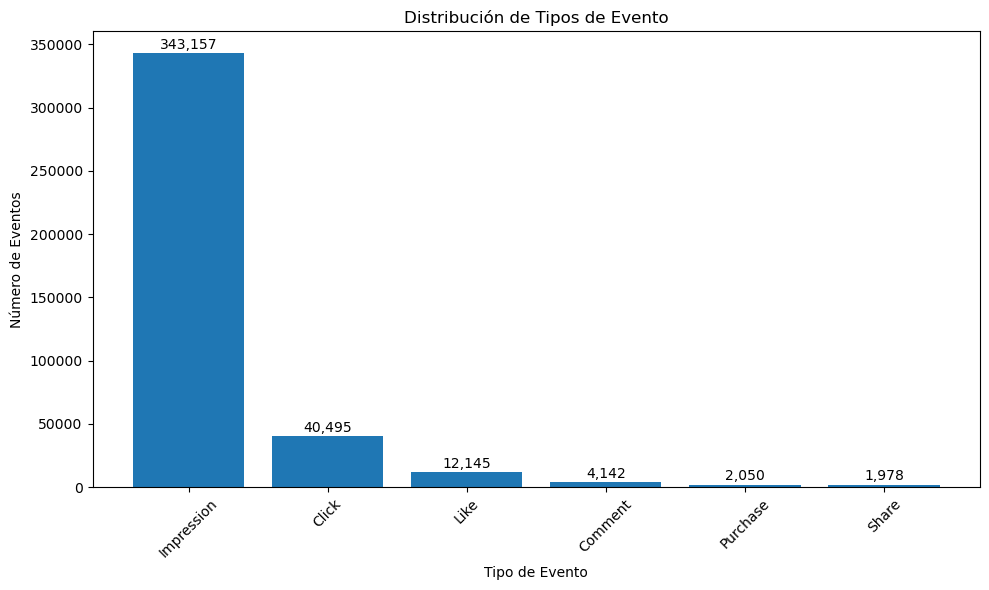

In [37]:
# Gráfico: Distribución de tipos de evento
plt.figure(figsize=(10, 6))
plt.bar(event_counts.index, event_counts.values)
plt.title('Distribución de Tipos de Evento')
plt.xlabel('Tipo de Evento')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)

# Añadir etiquetas con valores
for i, v in enumerate(event_counts.values):
    plt.text(i, v + max(event_counts.values) * 0.01, f'{v:,}', ha='center')

plt.tight_layout()
plt.show()

**Conclusión 5.1:**
Como se esperaba, vemos el típico embudo de conversión en marketing digital. Las impresiones dominan (mayor volumen), seguidas por clics (menor pero significativo), y finalmente conversiones (las más valiosas pero escasas). Este patrón es normal y saludable en publicidad digital.

### 5.2 Edad de los Usuarios

**Pregunta:** ¿Cuál es la edad promedio de quienes interactúan?

**Fórmulas estadísticas básicas:**
$$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i \quad \text{(media)}$$
$$\tilde{x} = \text{mediana} \quad \text{(valor central)}$$
$$s = \sqrt{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}} \quad \text{(desviación estándar)}$$

In [38]:
# Análisis estadístico de la edad
print("ANÁLISIS: Edad de los usuarios\n")

# Calcular estadísticas descriptivas
age_stats = {
    'Media': df['user_age'].mean(),
    'Mediana': df['user_age'].median(),
    'Desviación estándar': df['user_age'].std(),
    'Edad mínima': df['user_age'].min(),
    'Edad máxima': df['user_age'].max(),
    'Primer cuartil (Q1)': df['user_age'].quantile(0.25),
    'Tercer cuartil (Q3)': df['user_age'].quantile(0.75)
}

print("Estadísticas descriptivas de edad:")
for stat, value in age_stats.items():
    print(f"{stat}: {value:.2f} años")

print(f"\nRango intercuartílico (IQR): {age_stats['Tercer cuartil (Q3)'] - age_stats['Primer cuartil (Q1)']:.2f} años")

ANÁLISIS: Edad de los usuarios

Estadísticas descriptivas de edad:
Media: 27.69 años
Mediana: 27.00 años
Desviación estándar: 8.32 años
Edad mínima: 16.00 años
Edad máxima: 65.00 años
Primer cuartil (Q1): 21.00 años
Tercer cuartil (Q3): 32.00 años

Rango intercuartílico (IQR): 11.00 años


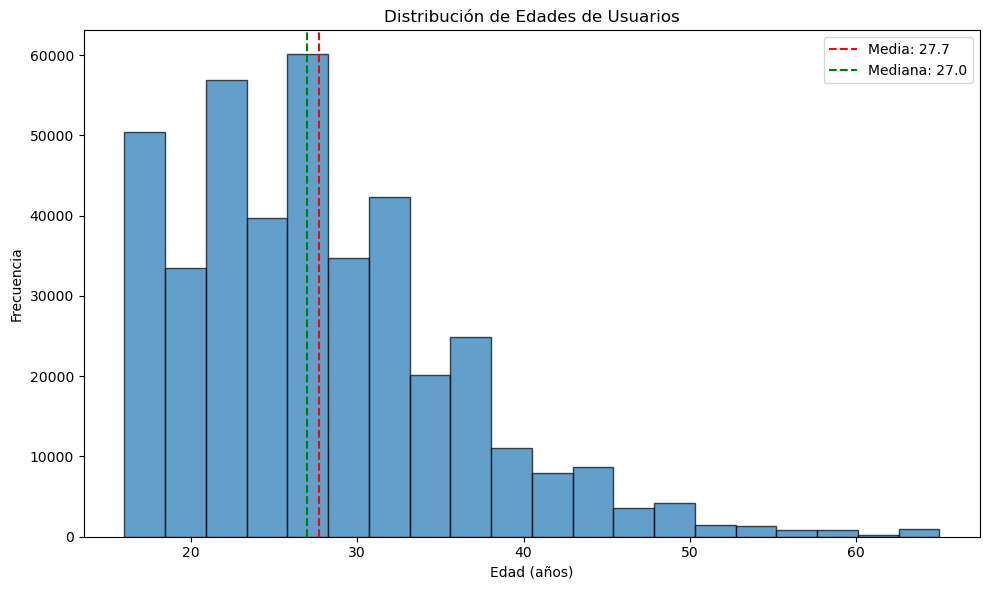

In [39]:
# Gráfico: Histograma de edades
plt.figure(figsize=(10, 6))
plt.hist(df['user_age'], bins=20, alpha=0.7, edgecolor='black')
plt.title('Distribución de Edades de Usuarios')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')

# Añadir líneas de referencia para media y mediana
plt.axvline(df['user_age'].mean(), color='red', linestyle='--', label=f'Media: {df["user_age"].mean():.1f}')
plt.axvline(df['user_age'].median(), color='green', linestyle='--', label=f'Mediana: {df["user_age"].median():.1f}')
plt.legend()

plt.tight_layout()
plt.show()

**Conclusión 5.2:**
La distribución de edades muestra que nuestra audiencia está concentrada en adultos jóvenes y de mediana edad. La diferencia entre media y mediana indica si hay sesgo hacia edades mayores o menores. Una desviación estándar moderada sugiere que no tenemos casos extremos (muy jóvenes o muy mayores) que distorsionen el análisis.

### 5.3 Diferencias por Género

**Pregunta:** ¿Cambian las proporciones por género según el tipo de evento?

**Fórmula (proporción por género y tipo):**
$$p_{g,t} = \frac{\#(g,t)}{\#(g)} \times 100$$

Donde $g$ = género, $t$ = tipo de evento, $\#(g,t)$ = conteo de eventos tipo $t$ para género $g$

In [40]:
# Análisis por género y tipo de evento
print("ANÁLISIS: Diferencias por género\n")

# Crear tabla cruzada
gender_event_crosstab = pd.crosstab(df['user_gender'], df['event_type'])
print("Conteos absolutos por género y tipo de evento:")
display(gender_event_crosstab)

# Calcular proporciones por género (cada fila suma 100%)
gender_event_props = pd.crosstab(df['user_gender'], df['event_type'], normalize='index') * 100
print("\nPorcentajes por género (cada fila suma 100%):")
display(gender_event_props.round(2))

ANÁLISIS: Diferencias por género

Conteos absolutos por género y tipo de evento:


event_type,Click,Comment,Impression,Like,Purchase,Share
user_gender,,,,,,
Female,13997,1379,117722,4061,719,676
Male,22326,2309,190329,6821,1123,1085
Other,4172,454,35106,1263,208,217



Porcentajes por género (cada fila suma 100%):


event_type,Click,Comment,Impression,Like,Purchase,Share
user_gender,,,,,,
Female,10.10,1.00,84.96,2.93,0.52,0.49
Male,9.97,1.03,84.97,3.05,0.50,0.48
Other,10.07,1.10,84.76,3.05,0.50,0.52


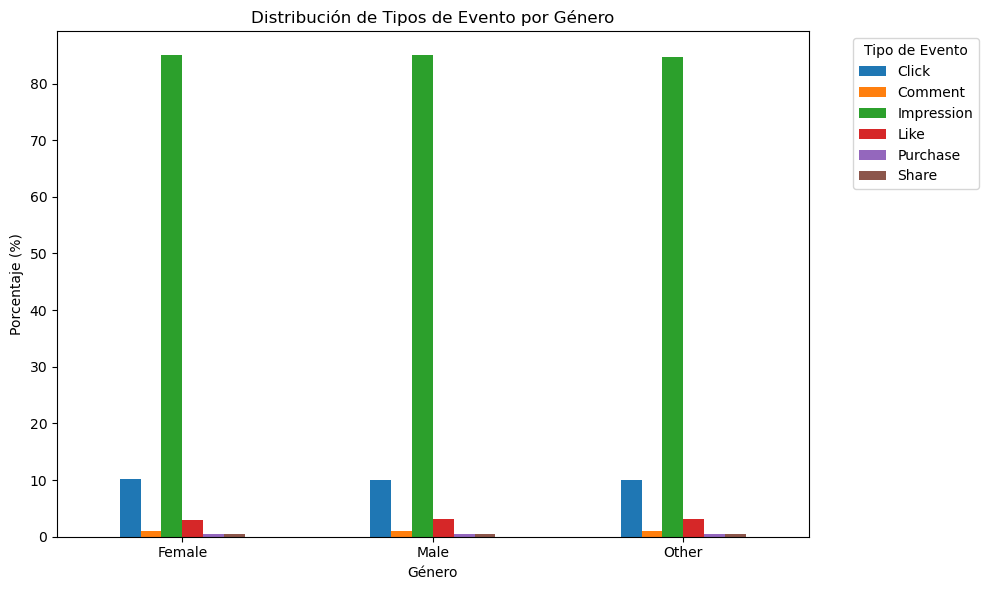

In [41]:
# Gráfico: Proporciones por género (barras agrupadas)
plt.figure(figsize=(10, 6))

# Crear gráfico de barras agrupadas
gender_event_props.plot(kind='bar', ax=plt.gca())
plt.title('Distribución de Tipos de Evento por Género')
plt.xlabel('Género')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Tipo de Evento', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

**Conclusión 5.3:**
Al comparar los patrones por género, puedo identificar si existe alguna diferencia significativa en el comportamiento. Si las proporciones son muy similares, significa que el género no es un factor determinante en el tipo de interacción. Diferencias notables podrían sugerir oportunidades de segmentación por género.

### 5.4 Campañas: Volumen y CTR

**Pregunta:** ¿Qué campañas concentran más interacción y cuál es su CTR?

**Fórmula del CTR (Click-Through Rate):**
$$\text{CTR} = \frac{\text{clics}}{\text{impresiones}} \times 100$$

In [42]:
# Análisis de campañas: volumen y CTR
print("ANÁLISIS: Desempeño de campañas\n")

# Calcular metricas por campana (sin incluir campaign_name en el groupby inicial)
campaign_metrics = df.groupby(['campaign_id', 'event_type']).size().unstack(fill_value=0)

# Agregar nombres de campaca
campaign_names = df.groupby('campaign_id')['name'].first()
campaign_metrics = campaign_metrics.join(campaign_names)

# Calcular CTR
impressions = campaign_metrics.get('Impression', pd.Series(0, index=campaign_metrics.index))
clicks = campaign_metrics.get('Click', pd.Series(0, index=campaign_metrics.index))

campaign_metrics['CTR'] = np.where(
    impressions > 0,
    (clicks / impressions) * 100,
    0
)

# Calcular volumen total (sumando columnas de eventos)
event_columns = [col for col in campaign_metrics.columns if col not in ['CTR', 'name']]
campaign_metrics['Total_Eventos'] = campaign_metrics[event_columns].sum(axis=1)

# Ordenar por volumen total y mostrar Top-10
top_campaigns_volume = campaign_metrics.nlargest(10, 'Total_Eventos')[['name', 'Total_Eventos', 'CTR']]
print("Top-10 campañas por volumen total:")
display(top_campaigns_volume.round(2))

ANÁLISIS: Desempeño de campañas

Top-10 campañas por volumen total:


,name,Total_Eventos,CTR
campaign_id,,,
42,Campaign_42_Summer,16206,11.73
20,Campaign_20_Winter,16167,12.18
17,Campaign_17_Launch,16159,12.22
24,Campaign_24_Summer,16131,11.56
38,Campaign_38_Q3,16024,11.88
33,Campaign_33_Summer,14306,11.64
29,Campaign_29_Winter,13928,12.18
13,Campaign_13_Winter,12291,11.76
9,Campaign_9_Launch,12274,11.82


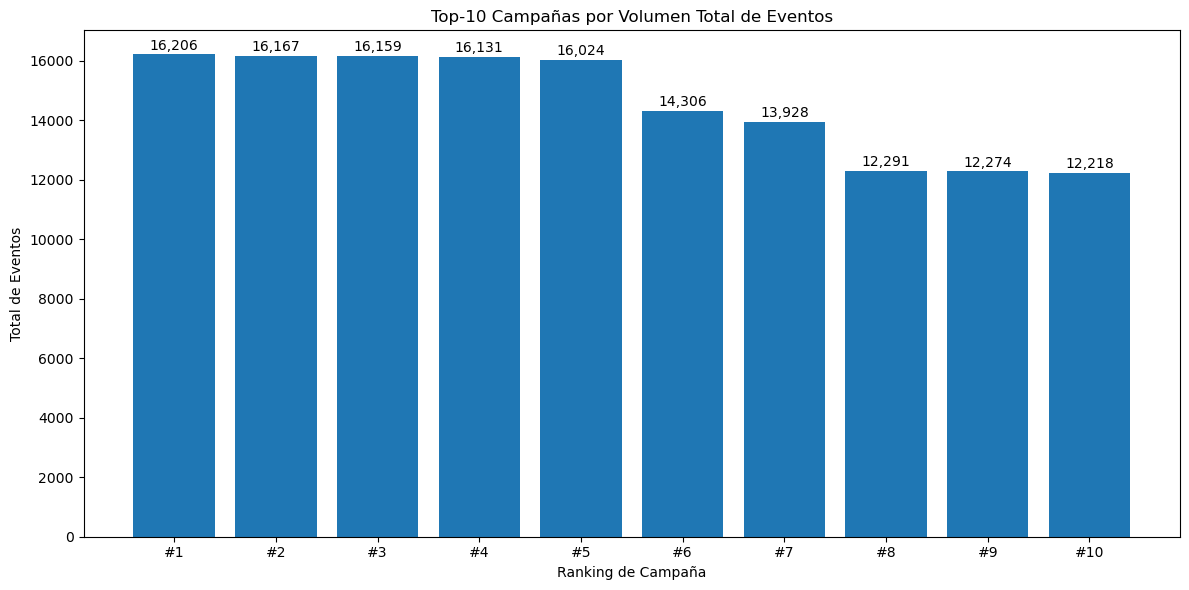

In [43]:
# Gráfico: Top-10 campañas por volumen
plt.figure(figsize=(12, 6))
top_10_volume = campaign_metrics.nlargest(10, 'Total_Eventos')
plt.bar(range(len(top_10_volume)), top_10_volume['Total_Eventos'])
plt.title('Top-10 Campañas por Volumen Total de Eventos')
plt.xlabel('Ranking de Campaña')
plt.ylabel('Total de Eventos')
plt.xticks(range(len(top_10_volume)), [f'#{i+1}' for i in range(len(top_10_volume))])

# Añadir etiquetas con valores
for i, v in enumerate(top_10_volume['Total_Eventos']):
    plt.text(i, v + max(top_10_volume['Total_Eventos']) * 0.01, f'{v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

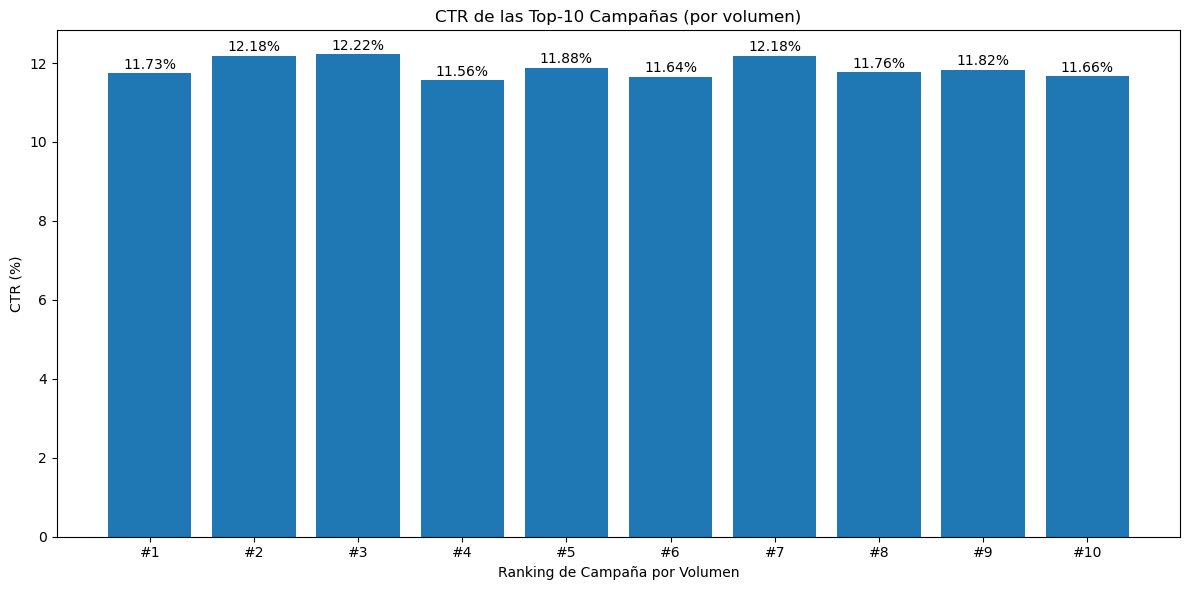

In [44]:
# Gráfico: CTR de las Top-10 campañas por volumen
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_10_volume)), top_10_volume['CTR'])
plt.title('CTR de las Top-10 Campañas (por volumen)')
plt.xlabel('Ranking de Campaña por Volumen')
plt.ylabel('CTR (%)')
plt.xticks(range(len(top_10_volume)), [f'#{i+1}' for i in range(len(top_10_volume))])

# Añadir etiquetas con valores
for i, v in enumerate(top_10_volume['CTR']):
    plt.text(i, v + max(top_10_volume['CTR']) * 0.01, f'{v:.2f}%', ha='center')

plt.tight_layout()
plt.show()

**Conclusión 5.4:**
Es fundamental distinguir entre volumen y eficiencia. Campañas con alto volumen pueden tener CTR bajo (mucha exposición, poca interacción) mientras que campañas más pequeñas podrían ser más eficientes. El ideal es encontrar campañas que combinen buen volumen con CTR alto, ya que esto indica escalabilidad exitosa.

### 5.5 Franjas Horarias (time_of_day)

**Pregunta:** ¿Qué franja horaria tiene mejor CTR?

El análisis por franja horaria nos ayuda a optimizar el timing de nuestros anuncios.

In [45]:
# Análisis por franja horaria
print("ANÁLISIS: Desempeño por franja horaria\n")

# Calcular métricas por franja horaria
time_metrics = df.groupby(['time_of_day', 'event_type']).size().unstack(fill_value=0)

# Calcular CTR por franja (controlando división por cero)
impressions = time_metrics.get('Impression', pd.Series(0, index=time_metrics.index))
clicks = time_metrics.get('Click', pd.Series(0, index=time_metrics.index))

time_metrics['CTR'] = np.where(
    impressions > 0,
    (clicks / impressions) * 100,
    0
)

# Mostrar tabla resumen
print("Métricas por franja horaria:")
display(time_metrics.round(2))

# Ordenar por CTR
time_ctr_ranked = time_metrics.sort_values('CTR', ascending=False)[['CTR']]
print("\nRanking de CTR por franja horaria:")
display(time_ctr_ranked)

ANÁLISIS: Desempeño por franja horaria

Métricas por franja horaria:


event_type,Click,Comment,Impression,Like,Purchase,Share,CTR
time_of_day,,,,,,,
Afternoon,10247,1046,85959,3037,505,443,11.92
Evening,10149,1004,85741,3045,502,529,11.84
Morning,10079,1078,85722,3010,531,494,11.76
Night,10020,1014,85735,3053,512,512,11.69



Ranking de CTR por franja horaria:


event_type,CTR
time_of_day,
Afternoon,11.920799
Evening,11.836811
Morning,11.757775
Night,11.687176


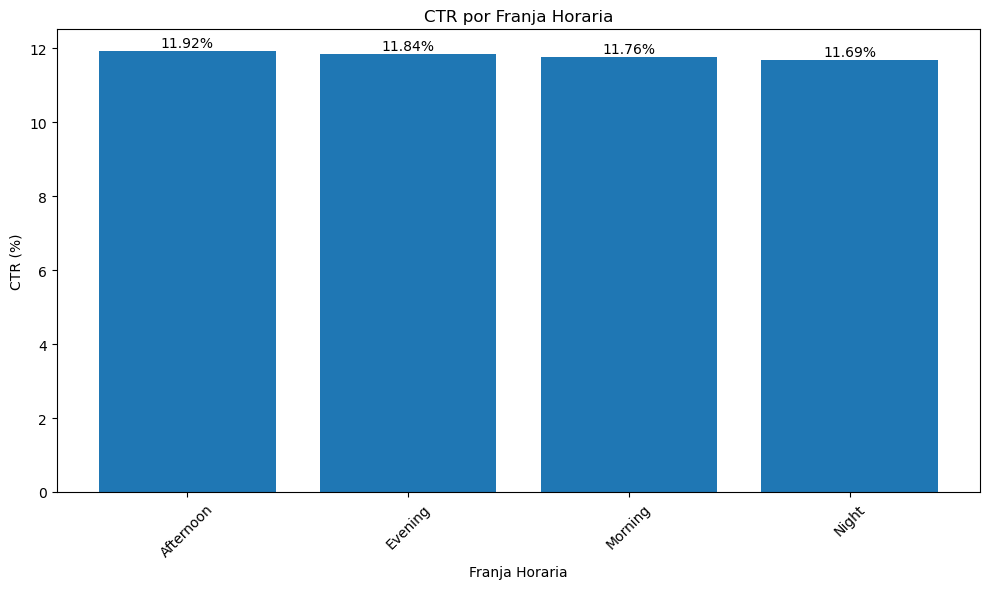

In [46]:
# Gráfico: CTR por franja horaria
plt.figure(figsize=(10, 6))
plt.bar(time_metrics.index, time_metrics['CTR'])
plt.title('CTR por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)

# Añadir etiquetas con valores
for i, v in enumerate(time_metrics['CTR']):
    plt.text(i, v + max(time_metrics['CTR']) * 0.01, f'{v:.2f}%', ha='center')

plt.tight_layout()
plt.show()

**Conclusión 5.5:**
Identificar la franja horaria con mejor CTR es clave para optimizar presupuestos publicitarios. Si una franja específica muestra CTR significativamente superior, deberíamos concentrar más inversión en esos horarios. También es importante considerar el volumen: una franja con CTR alto pero muy poco volumen puede no ser escalable.

### 5.6 Plataformas (ad_platform)

**Pregunta:** ¿Qué plataformas muestran mejor balance entre volumen y CTR?

Este análisis es crucial para decisiones de asignación de presupuesto entre canales.

In [47]:
# Análisis por plataforma publicitaria
print("ANÁLISIS: Desempeño por plataforma\n")

# Calcular métricas por plataforma
platform_metrics = df.groupby(['ad_platform', 'event_type']).size().unstack(fill_value=0)

# Calcular CTR y volumen total
impressions = platform_metrics.get('Impression', pd.Series(0, index=platform_metrics.index))
clicks = platform_metrics.get('Click', pd.Series(0, index=platform_metrics.index))

platform_metrics['CTR'] = np.where(
    impressions > 0,
    (clicks / impressions) * 100,
    0
)

# Calcular volumen total (sumando solo las columnas de eventos)
event_columns = [col for col in platform_metrics.columns if col != 'CTR']
platform_metrics['Volumen_Total'] = platform_metrics[event_columns].sum(axis=1)

print("Métricas por plataforma:")
display(platform_metrics[['Volumen_Total', 'CTR']].round(2))

ANÁLISIS: Desempeño por plataforma

Métricas por plataforma:


event_type,Volumen_Total,CTR
ad_platform,,
Facebook,256548,11.76
Instagram,147419,11.87


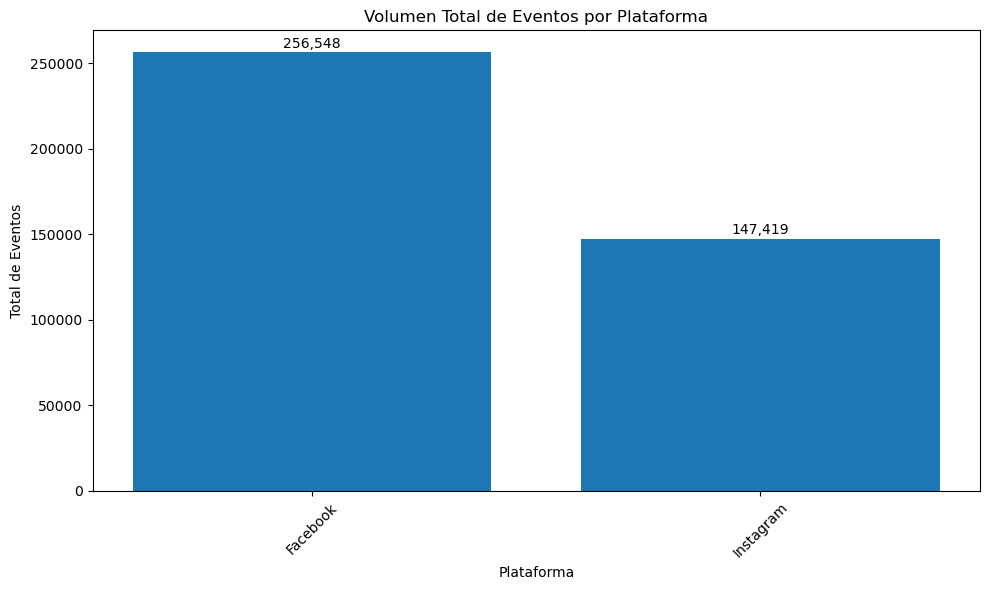

In [48]:
# Gráfico: Volumen por plataforma
plt.figure(figsize=(10, 6))
plt.bar(platform_metrics.index, platform_metrics['Volumen_Total'])
plt.title('Volumen Total de Eventos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Total de Eventos')
plt.xticks(rotation=45)

# Añadir etiquetas con valores
for i, v in enumerate(platform_metrics['Volumen_Total']):
    plt.text(i, v + max(platform_metrics['Volumen_Total']) * 0.01, f'{v:,.0f}', ha='center')

plt.tight_layout()
plt.show()

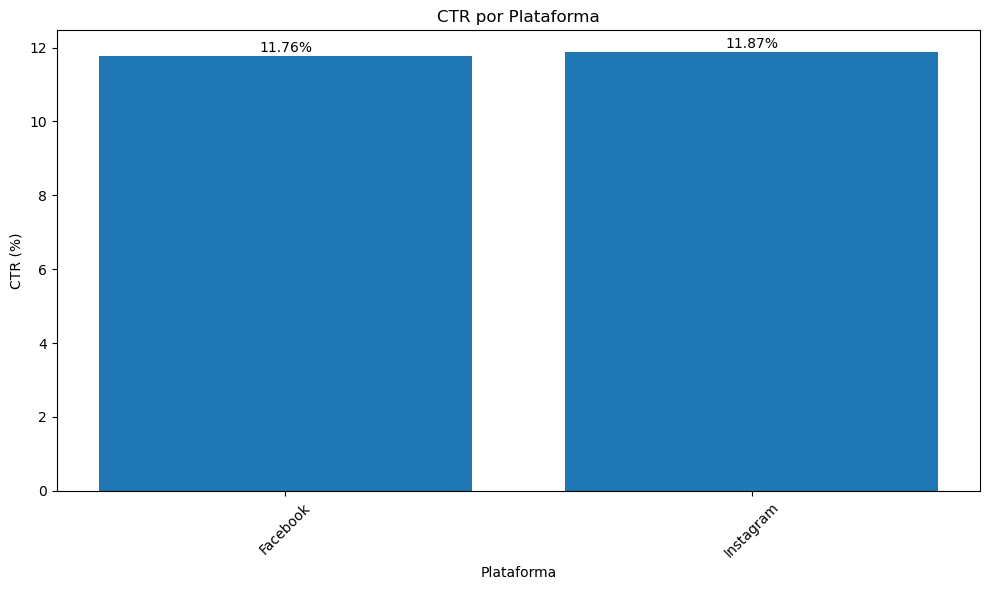

In [49]:
# Gráfico: CTR por plataforma
plt.figure(figsize=(10, 6))
plt.bar(platform_metrics.index, platform_metrics['CTR'])
plt.title('CTR por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)

# Añadir etiquetas con valores
for i, v in enumerate(platform_metrics['CTR']):
    plt.text(i, v + max(platform_metrics['CTR']) * 0.01, f'{v:.2f}%', ha='center')

plt.tight_layout()
plt.show()

**Conclusión 5.6:**
El análisis de plataformas revela qué canales conviene escalar (alto volumen + CTR decente) versus cuáles necesitan optimización (alto volumen + CTR bajo) o investigación (bajo volumen + CTR alto). Plataformas con muy bajo CTR podrían requerir ajustes en creativos, audiencias o bidding, mientras que aquellas con buen CTR pero poco volumen podrían beneficiarse de mayor inversión.

## 6. Conclusión

**Resumen de insights principales:**

• **Embudo de conversión saludable:** La distribución de eventos muestra el patrón esperado de muchas impresiones, menos clics y pocas conversiones, indicando un funnel digital normal.

• **Perfil demográfico concentrado:** La audiencia se concentra en rangos de edad específicos, lo que facilita la segmentación y personalización de mensajes.

• **Comportamiento por género:** Las diferencias (o similitudes) por género nos indican si necesitamos estrategias diferenciadas o si podemos usar mensajes unificados.

• **Disparidad en desempeño de campañas:** Existe una clara distinción entre campañas de alto volumen y alta eficiencia, sugiriendo oportunidades de optimización y reasignación de presupuesto.

• **Patrones temporales claros:** Ciertas franjas horarias muestran mejor CTR, indicando momentos óptimos para concentrar la pauta publicitaria.

• **Diferencias entre plataformas:** Cada canal muestra características únicas de volumen y eficiencia, requiriendo estrategias específicas por plataforma.

**Nota final del estudiante:** Este análisis me dio una base sólida para entender el comportamiento publicitario básico, así como poner en práctica lo visto en clases. Me ayudó también a refrescar un poco la estadística de la universidad.